In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import pickle

In [2]:
OBJECTIVE = "OBJECTIVE"
INEQUALITY_CONSTRAINT_ONE = "INEQUALITY_CONSTRAINT_ONE"
INEQUALITY_CONSTRAINT_TWO = "INEQUALITY_CONSTRAINT_TWO"
EQUALITY_CONSTRAINT_ONE = "EQUALITY_CONSTRAINT_ONE"
EQUALITY_CONSTRAINT_TWO = "EQUALITY_CONSTRAINT_TWO"

In [3]:
def process_ts_lsq_results(result_dir: str,
                           num_runs: int,
                           failure_val: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        inequality_constraint_two_satisfied = run_data[INEQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze() <= 0
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, inequality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [4]:
def process_ts_gsbp_results(result_dir: str,
                            num_runs: int,
                            failure_val: float,
                            equality_tolerance: float):
    all_results = []
    for run in range(num_runs):
        run_file = result_dir + f"run_{run}_data.pkl"
        with open(run_file, "rb") as fp:
            run_data = pickle.load(fp)
        inequality_constraint_one_satisfied = run_data[INEQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze() <= 0
        equality_constraint_one_satisfied = np.abs(run_data[EQUALITY_CONSTRAINT_ONE].observations.numpy().squeeze()) <= equality_tolerance
        equality_constraint_two_satisfied = np.abs(run_data[EQUALITY_CONSTRAINT_TWO].observations.numpy().squeeze()) <= equality_tolerance
        satisfied_mask = np.logical_and(inequality_constraint_one_satisfied, equality_constraint_one_satisfied)
        satisfied_mask = np.logical_and(satisfied_mask, equality_constraint_two_satisfied)
        failure_mask = np.logical_not(satisfied_mask)
        objective_vals = run_data[OBJECTIVE].observations.numpy().squeeze()
        safe_obs_values = objective_vals.copy()
        safe_obs_values[failure_mask] = failure_val
        all_results.append(np.minimum.accumulate(safe_obs_values))
    all_results = np.array(all_results)
    all_results = np.where(all_results < -0.5, -0.5273951, all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [5]:
def process_original_albo_lsq_results(result_dir: str,
                                      num_runs: int,
                                      failure_val: float):
    all_results = []
    for run in range(1, num_runs + 1):
        run_file = result_dir + f"run_{run}_results.json"
        with open(run_file, "rb") as fp:
            all_run_data = json.load(fp)
            run_results = all_run_data["prog"]
            i = 0
            while run_results[i] == "Inf":
                i += 1
            if i > 0:
                for j in range(i):
                    run_results[j] = failure_val
            all_results.append(run_results)
    all_results = np.array(all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

In [6]:
def process_original_albo_gsbp_results(result_dir: str,
                                       num_runs: int,
                                       failure_val: float):
    all_results = []
    for run in range(1, num_runs + 1):
        run_file = result_dir + f"run_{run}_results.json"
        with open(run_file, "rb") as fp:
            all_run_data = json.load(fp)
            run_results = all_run_data["prog"]
            i = 0
            while run_results[i] == "Inf":
                i += 1
            if i > 0:
                for j in range(i):
                    run_results[j] = failure_val
            all_results.append(run_results)
    all_results = np.array(all_results)
    all_results = np.where(all_results < -0.5, -0.5273951, all_results)
    all_results_mean = np.mean(all_results, axis=0)
    all_results_median = np.median(all_results, axis=0)
    all_results_std = np.std(all_results, axis=0)
    return all_results, all_results_mean, all_results_median, all_results_std

### LSQ

In [7]:
ts_al_kkt_lsq_results, ts_al_kkt_lsq_results_mean, ts_al_kkt_lsq_results_median, ts_al_kkt_lsq_results_std = process_ts_lsq_results("../results/04-04-23/lsq/al_kkt_update/data/", 100, 1.3)
ts_al_original_lsq_results, ts_al_original_lsq_results_mean, ts_al_original_lsq_results_median, ts_al_original_lsq_results_std = process_ts_lsq_results("../results/04-04-23/lsq/al_original_update/data/", 100, 1.3)
original_albo_lsq_results, original_albo_lsq_results_mean, original_albo_lsq_results_median, original_albo_lsq_results_std = process_original_albo_lsq_results("../results/original_albo/lsq/slack_al_optim_correct_rho_update_urate_one/data/", 100, 1.3)
random_lsq_results, random_lsq_results_mean, random_lsq_results_median, random_lsq_results_std = process_ts_lsq_results("../results/11-04-23/lsq_random/", 100, 1.3)

2023-04-14 13:10:05.599779: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 13:10:12.842123: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
print(original_albo_lsq_results_median[30])

0.6081356696655644


In [9]:
print(ts_al_original_lsq_results_median[30])

0.5998575863812923


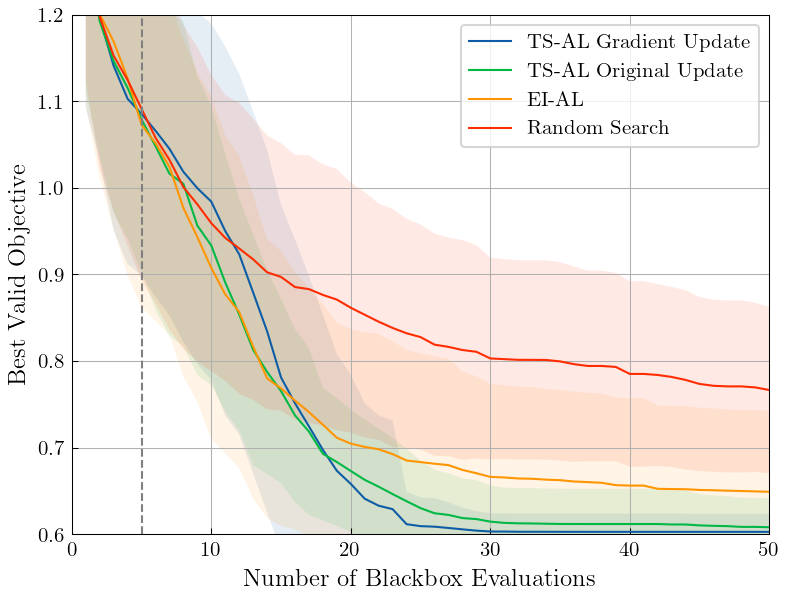

In [10]:
plt.style.use('plot_style.txt')
plt.figure(figsize=(6, 4.5))
iters = [i for i in range(1, 51)]
plt.plot(iters, ts_al_kkt_lsq_results_mean[:50], label="TS-AL Gradient Update")
plt.plot(iters, ts_al_original_lsq_results_mean[:50], label="TS-AL Original Update")
plt.plot(iters, original_albo_lsq_results_mean, label="EI-AL")
plt.plot(iters, random_lsq_results_mean[:50], label="Random Search")
plt.axvline(x=5, color='grey', linestyle='--')
plt.fill_between(iters, ts_al_kkt_lsq_results_mean[:50]+ts_al_kkt_lsq_results_std[:50], ts_al_kkt_lsq_results_mean[:50]-ts_al_kkt_lsq_results_std[:50], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, ts_al_original_lsq_results_mean[:50]+ts_al_original_lsq_results_std[:50], ts_al_original_lsq_results_mean[:50]-ts_al_original_lsq_results_std[:50], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, original_albo_lsq_results_mean[:50]+original_albo_lsq_results_std[:50], original_albo_lsq_results_mean[:50]-original_albo_lsq_results_std[:50], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, random_lsq_results_mean[:50]+random_lsq_results_std[:50], random_lsq_results_mean[:50]-random_lsq_results_std[:50], alpha=0.1, linestyle='-', linewidth=2)
plt.xlabel('Number of Blackbox Evaluations')
plt.ylabel('Best Valid Objective')
plt.legend()
plt.xlim(0, 50)
plt.ylim(0.6, 1.2)
plt.show()

### GSBP

In [11]:
ts_al_kkt_gsbp_results, ts_al_kkt_gsbp_results_mean, ts_al_kkt_gsbp_results_median, ts_al_kkt_gsbp_results_std = process_ts_gsbp_results("../results/05-04-23/gsbp/al_kkt_update/data/", 50, 2.1, equality_tolerance=0.01)
ts_al_original_gsbp_results, ts_al_original_gsbp_results_mean, ts_al_original_gsbp_results_median, ts_al_original_gsbp_results_std = process_ts_gsbp_results("../results/05-04-23/gsbp/al_original_update/data/", 50, 2.1, equality_tolerance=0.01)
sobol_results, sobol_results_mean, sobol_results_median, sobol_results_std = process_ts_gsbp_results("../results/11-04-23/gsbp_ts_al_original_sobol_conservative_penalty/data/",
                                                                                                     50, 2.1, equality_tolerance=0.01)
true_sobol_results, true_sobol_results_mean, true_sobol_results_median, true_sobol_results_std = process_ts_gsbp_results("../results/13-04-23/gsbp_ts_al_original_sobol_conservative_penalty/data/", 50, 2.1, equality_tolerance=0.01)
aggressive_results, aggressive_results_mean, aggressive_results_median, aggressive_results_std = process_ts_gsbp_results("../results/12-04-23/gsbp_ts_al_original_sobol_aggressive_penalty/data/", 50, 2.1, equality_tolerance=0.01)
true_aggressive_results, true_aggressive_results_mean, true_aggressive_results_median, true_aggressive_results_std = process_ts_gsbp_results("../results/13-04-23/gsbp_ts_al_original_sobol_aggressive_penalty/data/", 50, 2.1, equality_tolerance=0.01)
original_albo_gsbp_results, original_albo_gsbp_results_mean, original_albo_gsbp_results_median, original_albo_gsbp_results_std = process_original_albo_gsbp_results("../results/original_albo/gsbp/slack_al_optim_correct_rho_update_urate_one/data/", 50, 2.1)
random_gsbp_results, random_gsbp_results_mean, random_gsbp_results_median, random_gsbp_results_std = process_ts_gsbp_results("../results/11-04-23/gsbp_random/", 50, 2.1, equality_tolerance=0.01)

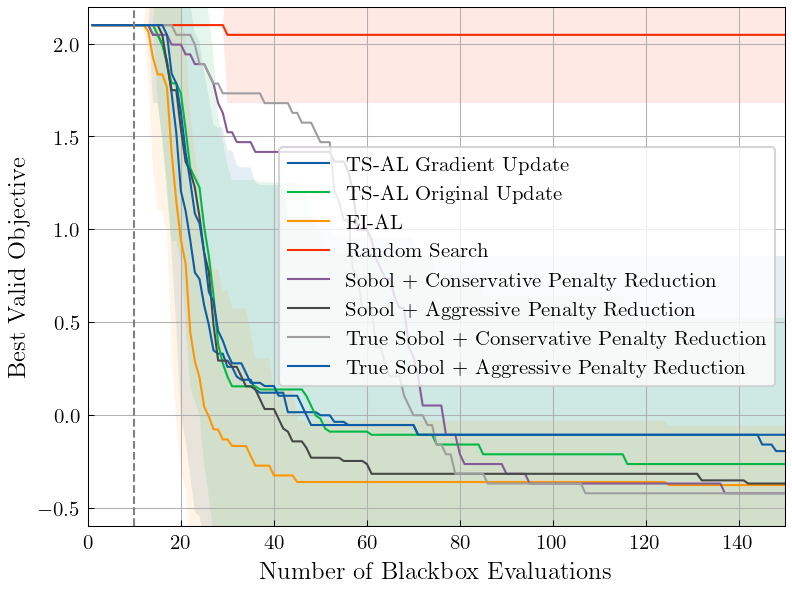

In [12]:
plt.style.use('plot_style.txt')
plt.figure(figsize=(6, 4.5))
iters = [i for i in range(1, 151)]
plt.plot(iters, ts_al_kkt_gsbp_results_mean[:150], label="TS-AL Gradient Update")
plt.plot(iters, ts_al_original_gsbp_results_mean[:150], label="TS-AL Original Update")
plt.plot(iters, original_albo_gsbp_results_mean, label="EI-AL")
plt.plot(iters, random_gsbp_results_mean[:150], label="Random Search")
plt.plot(iters, sobol_results_mean[:150], label="Sobol + Conservative Penalty Reduction")
plt.plot(iters, aggressive_results_mean[:150], label="Sobol + Aggressive Penalty Reduction")
plt.plot(iters, true_sobol_results_mean[:150], label="True Sobol + Conservative Penalty Reduction")
plt.plot(iters, true_aggressive_results_mean[:150], label="True Sobol + Aggressive Penalty Reduction")
plt.axvline(x=10, color='grey', linestyle='--')
plt.fill_between(iters, ts_al_kkt_gsbp_results_mean[:150]+ts_al_kkt_gsbp_results_std[:150], ts_al_kkt_gsbp_results_mean[:150]-ts_al_kkt_gsbp_results_std[:150], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, ts_al_original_gsbp_results_mean[:150]+ts_al_original_gsbp_results_std[:150], ts_al_original_gsbp_results_mean[:150]-ts_al_original_gsbp_results_std[:150], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, original_albo_gsbp_results_mean[:150]+original_albo_gsbp_results_std[:150], original_albo_gsbp_results_mean[:150]-original_albo_gsbp_results_std[:150], alpha=0.1, linestyle='-', linewidth=2)
plt.fill_between(iters, random_gsbp_results_mean[:150]+random_gsbp_results_std[:150], random_gsbp_results_mean[:150]-random_gsbp_results_std[:150], alpha=0.1, linestyle='-', linewidth=2)
plt.xlabel('Number of Blackbox Evaluations')
plt.ylabel('Best Valid Objective')
plt.legend()
plt.xlim(0, 150)
plt.ylim(-0.6, 2.2)
plt.show()

In [13]:
with open(f"../results/11-04-23/gsbp_ts_al_original_sobol_conservative_penalty/data/run_1_trick_location_trajectory_observations.pkl", "rb") as fp:
    trick_obs = pickle.load(fp)

In [ ]:
run=2
with open(f"../results/12-04-23/gsbp_ts_al_original_sobol_aggressive_penalty/data/run_{run}_data.pkl", "rb") as fp:
    data = pickle.load(fp)
data["OBJECTIVE"].observations[-10]

In [167]:
run = 26
with open(f"../results/05-04-23/gsbp/al_original_update/data/run_{run}_data.pkl", "rb") as fp:
    data = pickle.load(fp)
data["OBJECTIVE"].query_points[:10]

<tf.Tensor: shape=(10, 2), dtype=float64, numpy=
array([[0.65062058, 0.23672309],
       [0.13210708, 0.59205994],
       [0.59676325, 0.00981244],
       [0.06743639, 0.41250731],
       [0.96200489, 0.13931285],
       [0.33516351, 0.16665507],
       [0.73143159, 0.80984831],
       [0.23665159, 0.40800009],
       [0.67895293, 0.70223735],
       [0.64627307, 0.37090931]])>

In [48]:
print(true_aggressive_results[:,-1])

[-0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
  2.1        -0.5273951   2.1        -0.5273951  -0.5273951  -0.5273951
  0.32428761 -0.5273951  -0.5273951   2.1        -0.5273951  -0.5273951
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
  2.1        -0.5273951  -0.5273951  -0.5273951   2.1        -0.5273951
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951   2.1       ]


In [40]:
print(aggressive_results[:,-1])

[-0.5273951 -0.5273951  2.1       -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951  2.1        2.1
 -0.5273951 -0.5273951]


In [15]:
print(true_sobol_results[:,-1])

[-0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951  2.1       -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951  2.1       -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951]


In [41]:
print(sobol_results[:,-1])

[-0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
  2.1       -0.5273951 -0.5273951 -0.5273951  2.1       -0.5273951
 -0.5273951 -0.5273951]


In [165]:
print(ts_al_original_gsbp_results[:,-1])

[-0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951  2.1       -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951  2.1       -0.5273951 -0.5273951
  2.1       -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951 -0.5273951
 -0.5273951  2.1       -0.5273951 -0.5273951  2.1       -0.5273951
 -0.5273951 -0.5273951]


In [160]:
print(original_albo_gsbp_results[:,-100])

[-0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951   0.31824271
 -0.5273951   0.29696942 -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951  -0.5273951   0.28881867 -0.5273951   0.29571856  0.31928504
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951
 -0.5273951  -0.5273951  -0.5273951  -0.5273951  -0.5273951   0.2906346
 -0.5273951  -0.5273951   0.29479246  0.31416716 -0.5273951   0.30049195
 -0.5273951   0.29887258]


In [1]:
from absl import app, flags
import tensorflow as tf
import numpy as np
import trieste
from trieste.acquisition.optimizer import generate_al_continuous_optimizer
from trieste.acquisition.function.new_constrained_thompson_sampling import BatchThompsonSamplingAugmentedLagrangian
from trieste.acquisition.rule import ALEfficientGlobalOptimization
from trieste.models.gpflow import build_zero_mean_gpr, build_gpr, GaussianProcessRegression
from trieste.space import Box
from functions import constraints
from functions import objectives
from functools import partial
import pickle

2023-04-12 16:22:44.766624: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-12 16:22:52.134444: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
OBJECTIVE = "OBJECTIVE"
INEQUALITY_CONSTRAINT_ONE = "INEQUALITY_CONSTRAINT_ONE"
INEQUALITY_CONSTRAINT_TWO = "INEQUALITY_CONSTRAINT_TWO"
EQUALITY_CONSTRAINT_ONE = "EQUALITY_CONSTRAINT_ONE"
EQUALITY_CONSTRAINT_TWO = "EQUALITY_CONSTRAINT_TWO"


In [13]:
def create_model(search_space, num_rff_features, data):
    gpr = build_zero_mean_gpr(data, search_space, likelihood_variance=1e-7, kernel_priors=False)
    return GaussianProcessRegression(gpr, num_rff_features=num_rff_features)

In [14]:
search_space = Box([0.0, 0.0], [1.0, 1.0])

observer = trieste.objectives.utils.mk_multi_observer(
        OBJECTIVE=objectives.goldstein_price,
        INEQUALITY_CONSTRAINT_ONE=constraints.toy_constraint_one,
        EQUALITY_CONSTRAINT_ONE=constraints.centered_branin,
        EQUALITY_CONSTRAINT_TWO=constraints.parr_constraint)

initial_inputs = search_space.sample_sobol(10, skip=42+10)
print(f"Initial Inputs: {initial_inputs}")
initial_data = observer(initial_inputs)
initial_models = trieste.utils.map_values(partial(create_model, search_space, 1000),
                                          initial_data)

Initial Inputs: [[0.953125 0.859375]
 [0.703125 0.109375]
 [0.203125 0.609375]
 [0.140625 0.421875]
 [0.640625 0.921875]
 [0.890625 0.171875]
 [0.390625 0.671875]
 [0.265625 0.046875]
 [0.765625 0.546875]
 [0.515625 0.296875]]


In [15]:
initial_models['EQUALITY_CONSTRAINT_ONE'].model

name,class,transform,prior,trainable,shape,dtype,value
GPR.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPR.kernel.lengthscales,Parameter,Softplus,,True,"(2,)",float64,[0.28284 0.28284]
GPR.likelihood.variance,Parameter,Softplus + Shift,,False,(),float64,0.0
GPR.data[0],ResourceVariable,,,False,"(None, 2)",float64,"[[0.95312, 0.85938..."
GPR.data[1],ResourceVariable,,,False,"(None, 1)",float64,[[-0.90831...


In [26]:
run = 6
with open(f"../results/05-04-23/gsbp/al_original_update/data/run_{run}_data.pkl", "rb") as fp:
    data = pickle.load(fp)
data["OBJECTIVE"].query_points

<tf.Tensor: shape=(150, 2), dtype=float64, numpy=
array([[0.9286243 , 0.77142849],
       [0.34055484, 0.86262469],
       [0.33446332, 0.36532227],
       [0.09988221, 0.05510078],
       [0.19258045, 0.08625854],
       [0.43099064, 0.42097884],
       [0.06000729, 0.60409479],
       [0.34099581, 0.56349509],
       [0.96959263, 0.27337429],
       [0.32161795, 0.04567945],
       [0.33554927, 0.35832188],
       [0.47987162, 0.35773457],
       [0.31436599, 0.39925758],
       [0.27336529, 0.42356026],
       [0.36645972, 0.43781978],
       [0.38248333, 0.46620647],
       [0.30451596, 0.45710047],
       [0.34985106, 0.45500518],
       [0.80822296, 1.        ],
       [1.        , 0.32401945],
       [0.92177362, 0.28653998],
       [0.26717084, 0.47292282],
       [0.20558167, 0.37163326],
       [0.96528689, 0.4936634 ],
       [0.93100886, 0.4512978 ],
       [0.95011553, 0.46817887],
       [0.94646756, 0.46927999],
       [0.94774845, 0.46899851],
       [0.94767733, 0.4685